# Faceting Plots with  `sns.FacetGrid()` and `.map()`

**Multiple copies of the same type of plot visualized on different subsets of the data.**


[Faceting using sns.FacetGrid()]()

In [11]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

### Example 1: Using faceting as an alternative way to violin plot.

___Context:___

Study on the distribution pattern of `comb` by each type of car.

To achieve:

- Compare violin plots and facet plots
- Resize the bins
- Parameters: `col_wrap` and `sharey`

In [13]:
# 导入数据
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [15]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

**Previously we have explore the shape of the data using violin plot.**

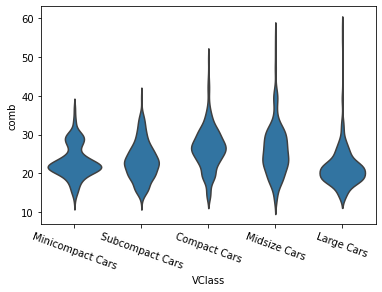

In [26]:
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=sns.color_palette()[0], inner=None)
plt.xticks(rotation=-20);

**Next, use `sns.FacetGrid()` and `.map()` methods to make facet plots.**

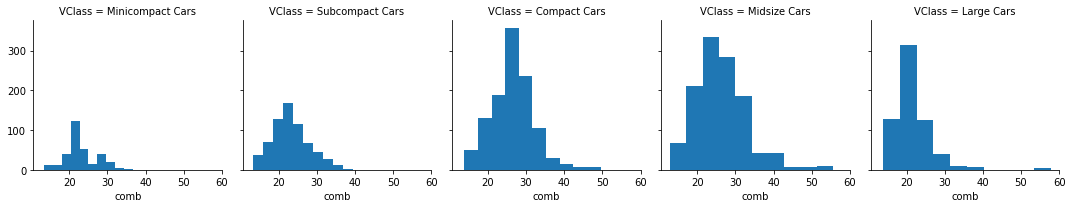

In [18]:
g = sns.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, 'comb');

___Notice:___

If set `sharey=False`:

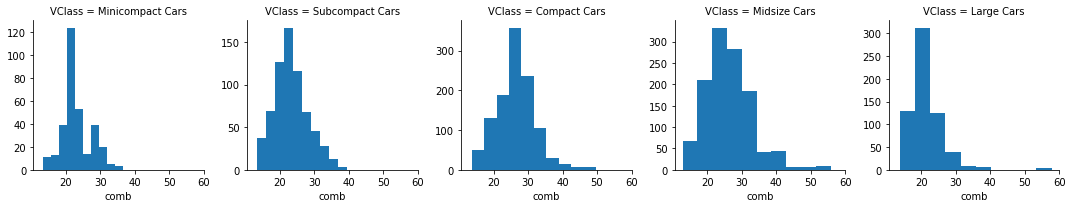

In [27]:
g = sns.FacetGrid(data=fuel_econ, col='VClass', sharey=False)
g.map(plt.hist, 'comb');

**Furthermore, resize the bin size ...**

In [30]:
fuel_econ.groupby('VClass').comb.describe().T

VClass,Minicompact Cars,Subcompact Cars,Compact Cars,Midsize Cars,Large Cars
count,321.000000,673.000000,1122.000000,1188.000000,625.000000
mean,23.152877,23.303826,26.504232,26.180177,21.519717
std,4.240233,4.871526,5.558006,6.807304,5.000261
min,13.384900,13.311700,13.780100,12.821700,13.863400
25%,20.755000,19.632500,23.131750,21.608875,18.627700
50%,22.100000,22.980100,26.494650,25.503150,20.978200
75%,25.358800,26.124600,29.878200,29.843900,22.837700
max,36.612200,39.485000,49.568500,55.700000,57.782400


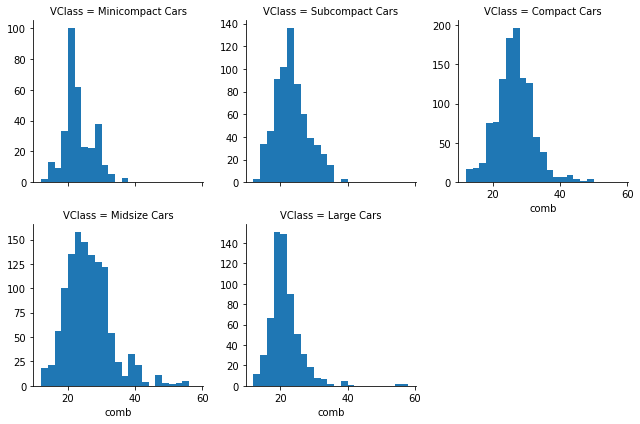

In [36]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

### Example 3: Use Facet Plots to Study on the Data Distribution of `trans`  by Car Types. 

- Use `col_wrap` parameter to control the maximum number of graph per row.
- Use `col_order` parameter to control the ordering of each facet plot.

In [37]:
# How many `trans` types are there?
fuel_econ.trans.value_counts()

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Automatic 6-spd                     126
Manual 5-spd                        126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S7)                    43
Automatic (AV-S6)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S9)                       14
Automatic (S5)                       14
Automatic (S10)                      13
Automatic (A1)                        7


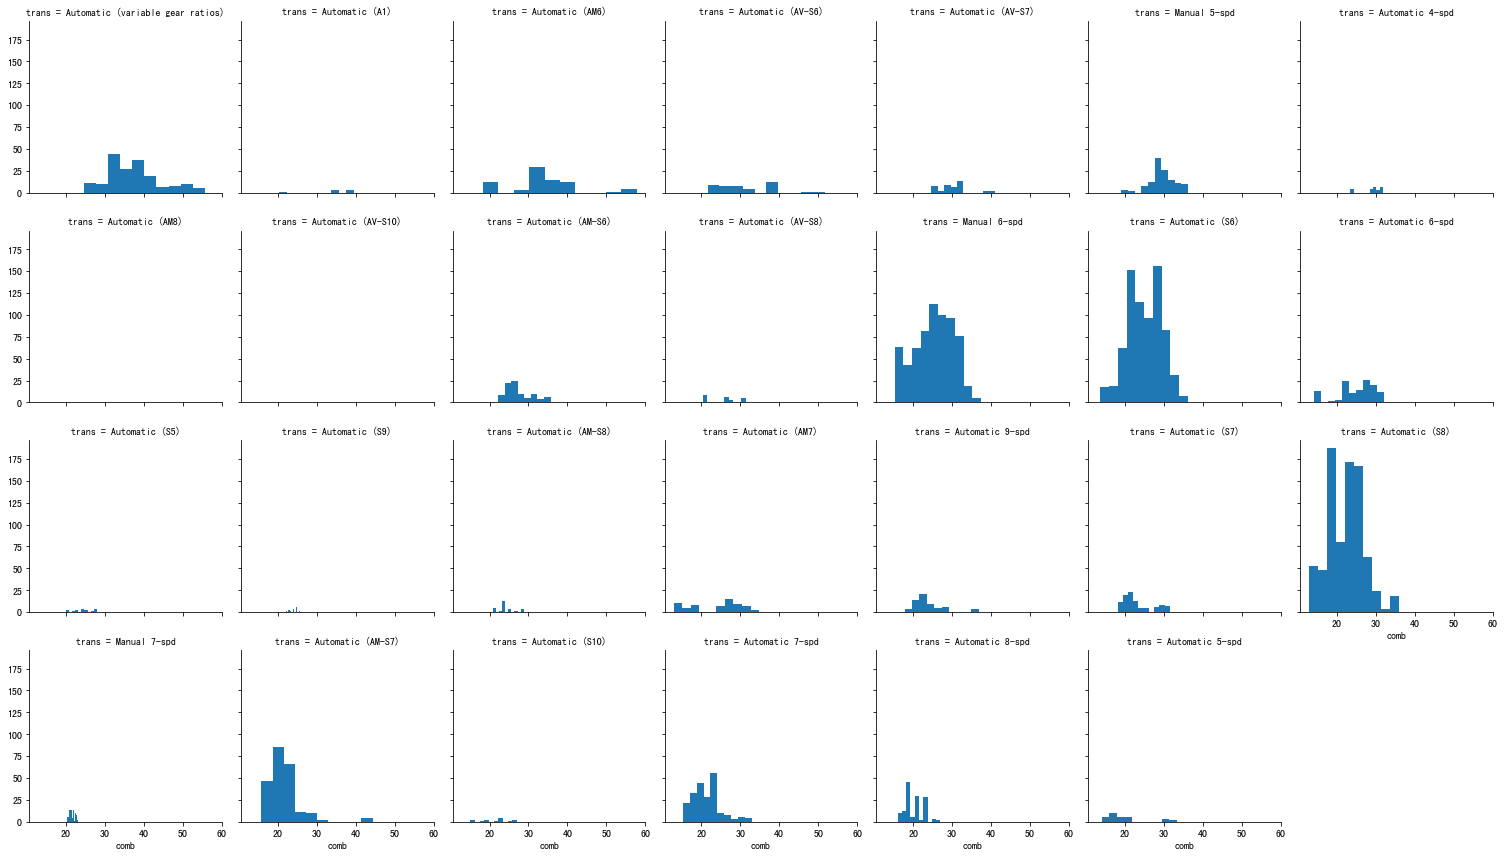

In [13]:
# Find the order in which we want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sns.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb');

### Example 4: Use facet plots to study on the distribution of car efficiency made by different manufacturers.

Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot.

___STEPS:___

**Step 1. Filter out the manufacturers who made cars more than 80 in the dataset.**

**Step 2. Order these manufacturers by average mpg (miles per gallon) in descending order.**

**Step 3: Facet Plotting using `plt.hist()`.**

**Step 4: Try both with `plt.hist()` function and `sns.distplot()` function, considering absolute frequency and relative frequency.**

---


#### Step 1: Filter out the manufacturers who made cars more than 80 in the dataset.

In [71]:
fuel_econ[fuel_econ['make'].isin(make_freq_idx)].

BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
Audi             201
MINI             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: make, dtype: int64

In [84]:
threshold = 80

make_freq_mask = fuel_econ['make'].value_counts() > Threshold

n_make_freq = np.sum(make_freq_mask)

make_freq_idx = fuel_econ['make'].value_counts()[make_freq_mask].index

most_makes = fuel_econ[fuel_econ['make'].isin(make_freq_idx)]

print("There are {} manufacturers with output beyond {}.\n".format(n_make_freq, threshold))
print("These manufactureres are: \n{}".format('\n'.join(make_freq_idx)))

There are 18 manufacturers with output beyond 80.

These manufactureres are: 
BMW
Mercedes-Benz
Porsche
Ford
Chevrolet
Audi
MINI
Volkswagen
Hyundai
Dodge
Lexus
Kia
Cadillac
Toyota
Infiniti
Honda
Jaguar
Mazda


#### Step 2. Order these manufacturers by average mpg (miles per gallon) in descending order.

In [90]:
make_means = most_makes.groupby('make')['comb'].mean()

facet_order = make_means.sort_values(ascending=False).index

print("Ordered by average efficiency (in descending order): \n{}".format('\n'.join(facet_order)))

Ordered by average efficiency (in descending order): 
Toyota
Honda
Mazda
Hyundai
Kia
MINI
Volkswagen
Chevrolet
Ford
Lexus
Audi
BMW
Infiniti
Dodge
Cadillac
Mercedes-Benz
Porsche
Jaguar


#### Step 3: Facet Plotting using plt.hist().

In [91]:
# Review the summary statistics of the `comb` to determine which bin width value to take.
most_makes.comb.describe()

count    3208.000000
mean       25.198091
std         5.956012
min        13.858000
25%        21.000000
50%        24.391000
75%        28.530925
max        57.782400
Name: comb, dtype: float64

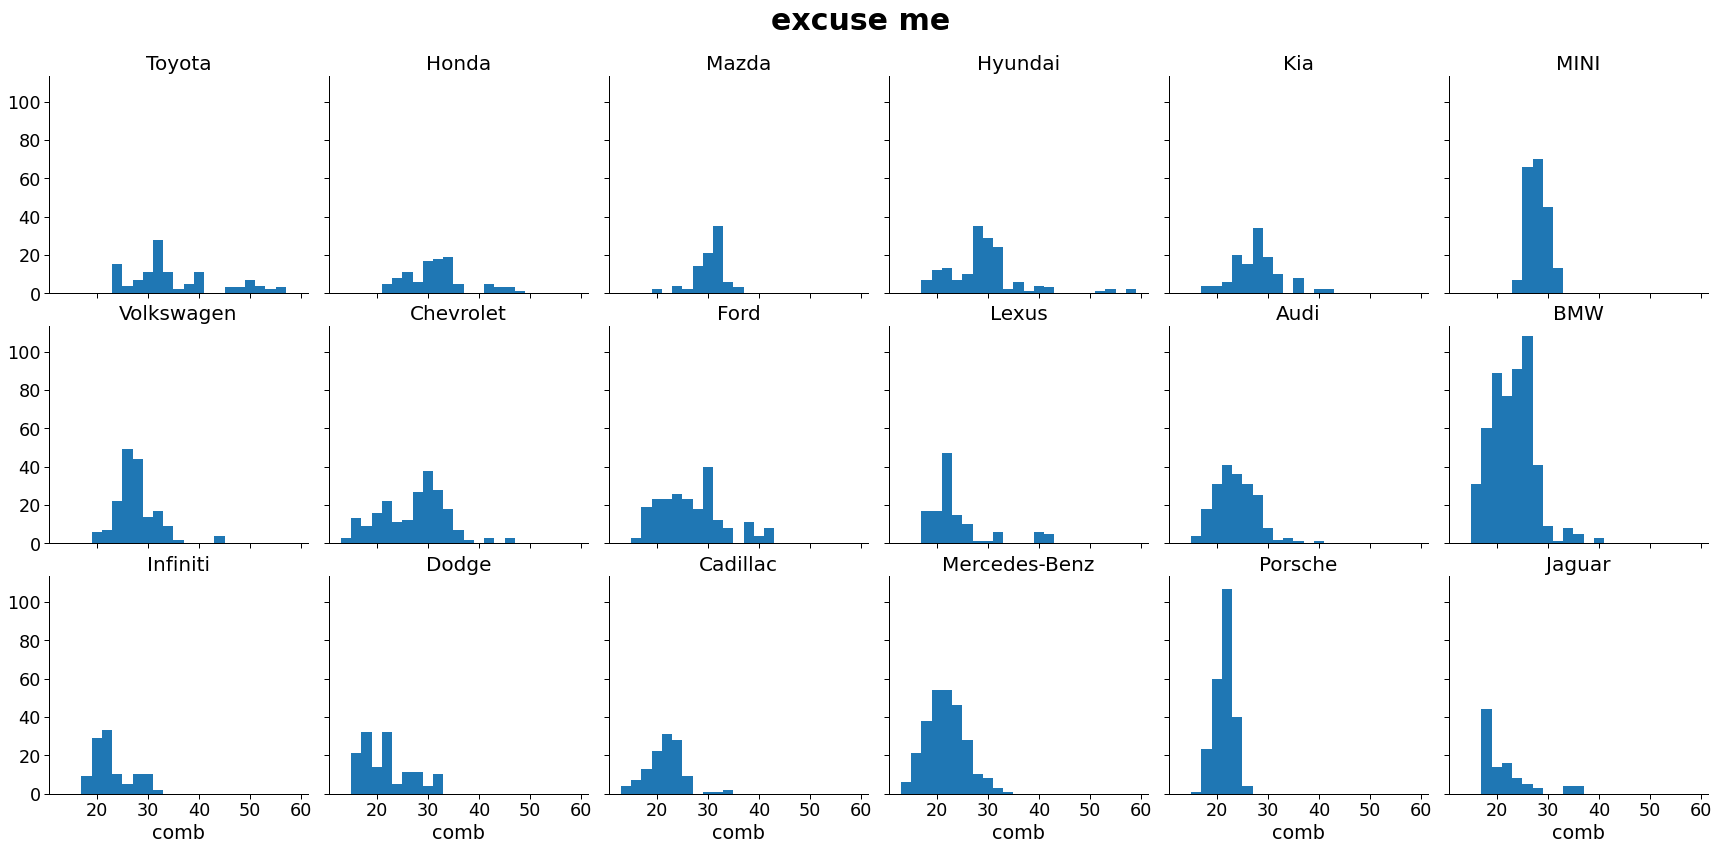

In [885]:
# Determine the bin width
lower_bound, upper_bound =  np.floor(most_makes.comb.min()), np.ceil(most_makes.comb.max())
bin_width = 2
bin_edges = np.arange(lower_bound, upper_bound+bin_width, bin_width)

with sns.plotting_context('paper', font_scale = 2):
    g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(plt.hist, 'comb', bins=bin_edges)
g.set_titles('{col_name}', size=20)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('excuse me', fontsize=30, fontweight='bold');

#### Step 4: Try both with `plt.hist()` function and `sns.distplot()` function, considering absolute frequency and relative frequency.

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.

<br>

**Trial 1: Use `plt.hist(density=True)`**

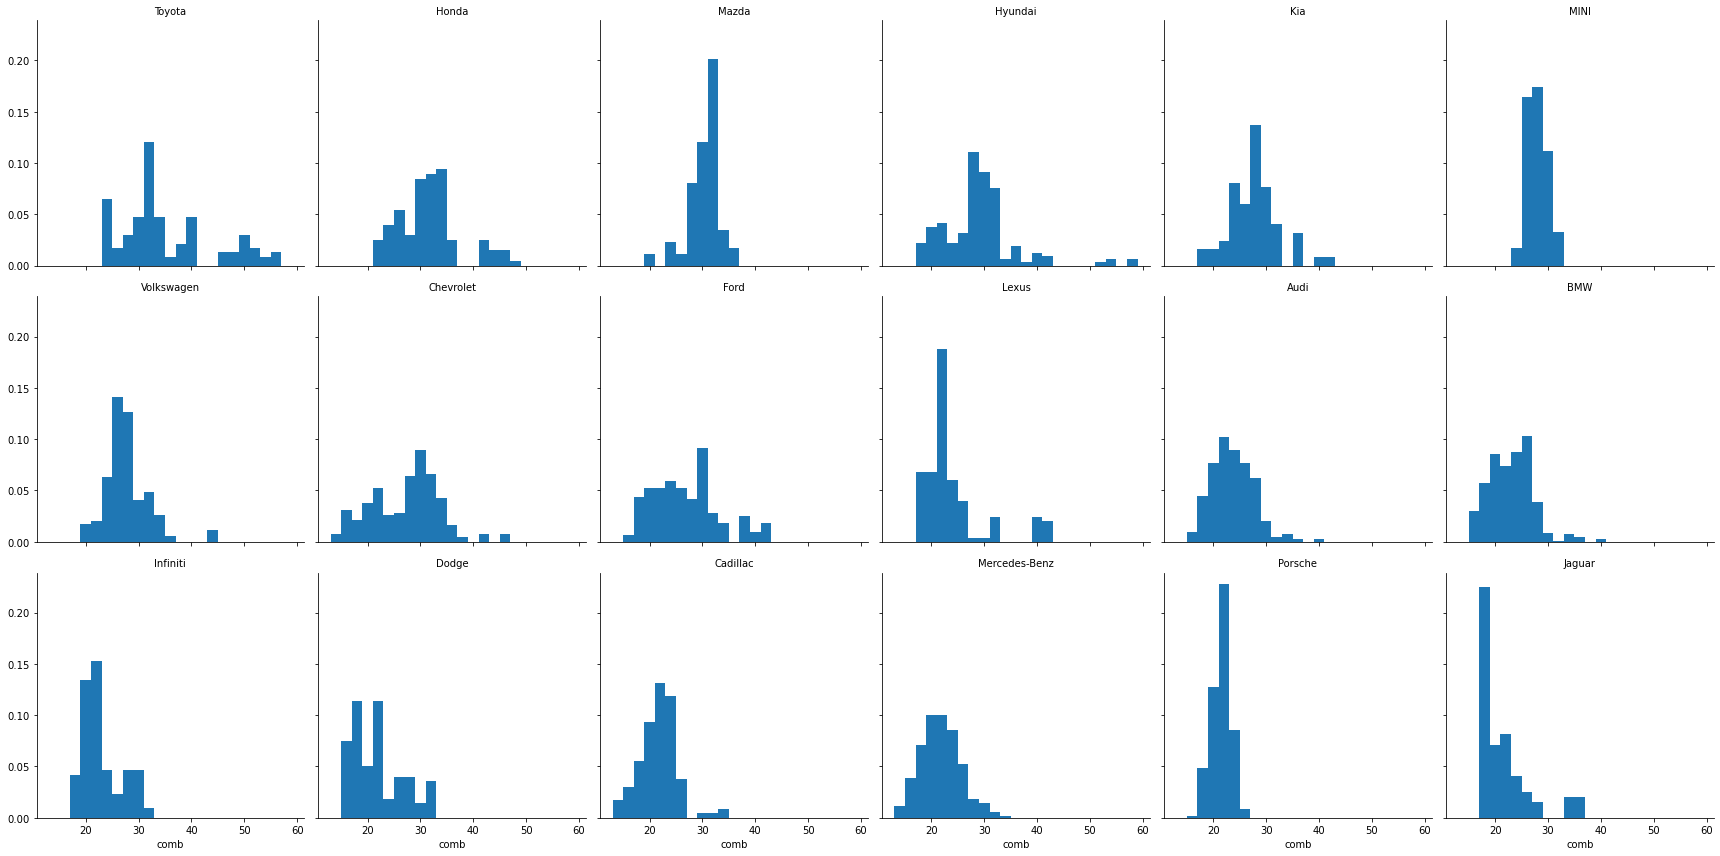

In [118]:
g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(plt.hist, 'comb', bins=bin_edges, density=True)
g.set_titles('{col_name}');

**Trial 2: Use `sns.histplot(stat='count')` function.**

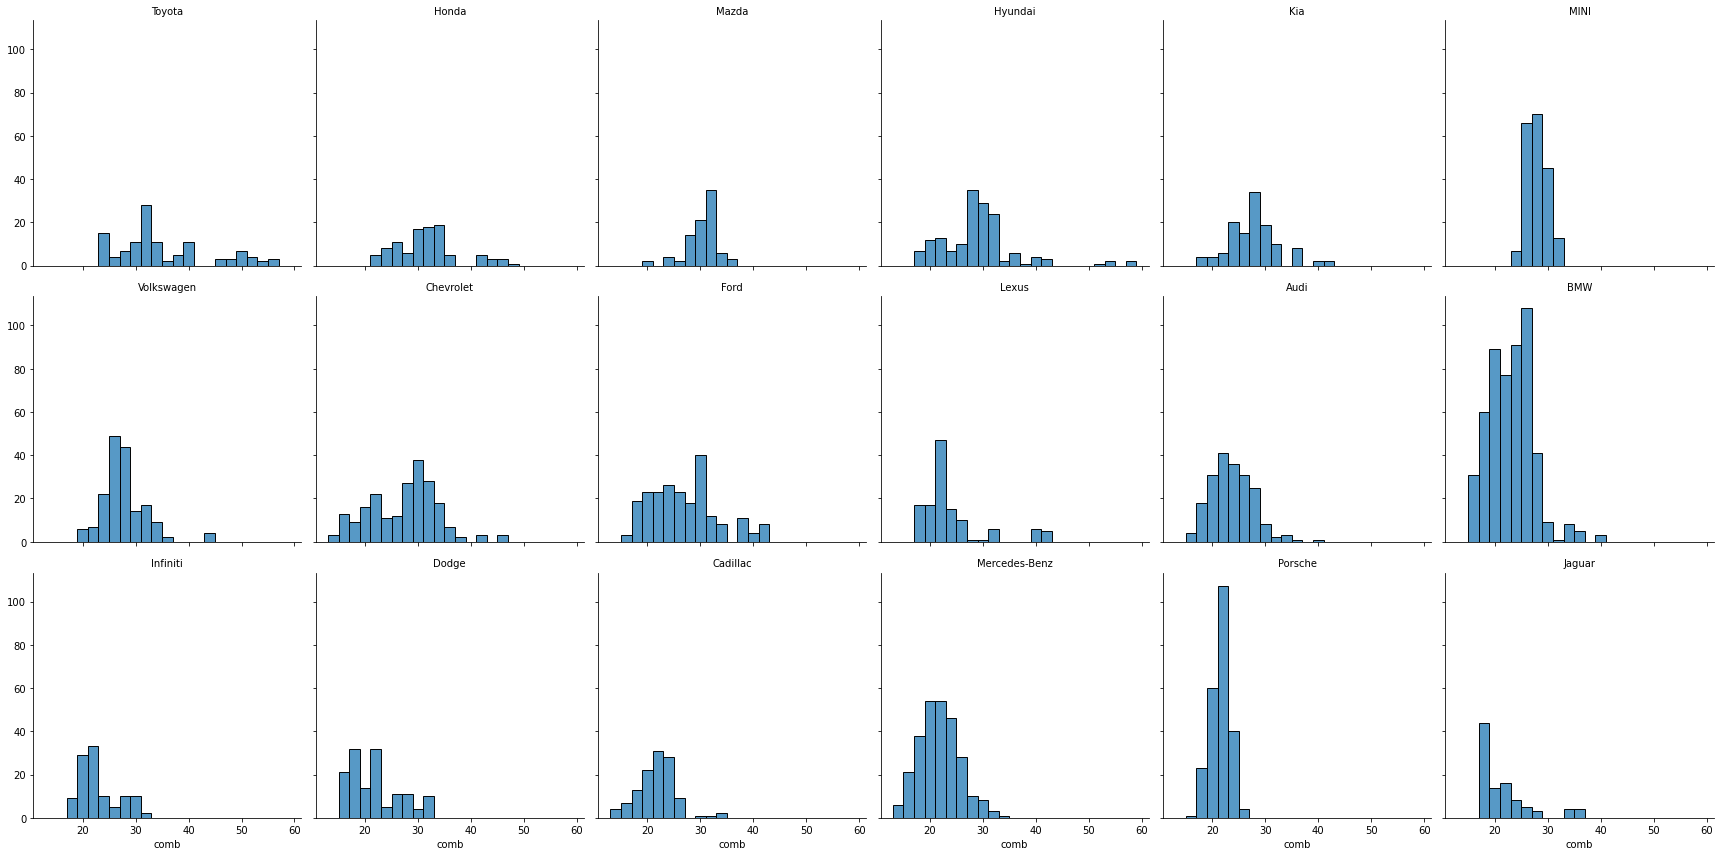

In [122]:
g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(sns.histplot, 'comb', bins=bin_edges)
g.set_titles('{col_name}');

**Trial 3: Use `sns.histplot(stat='density')` function.**

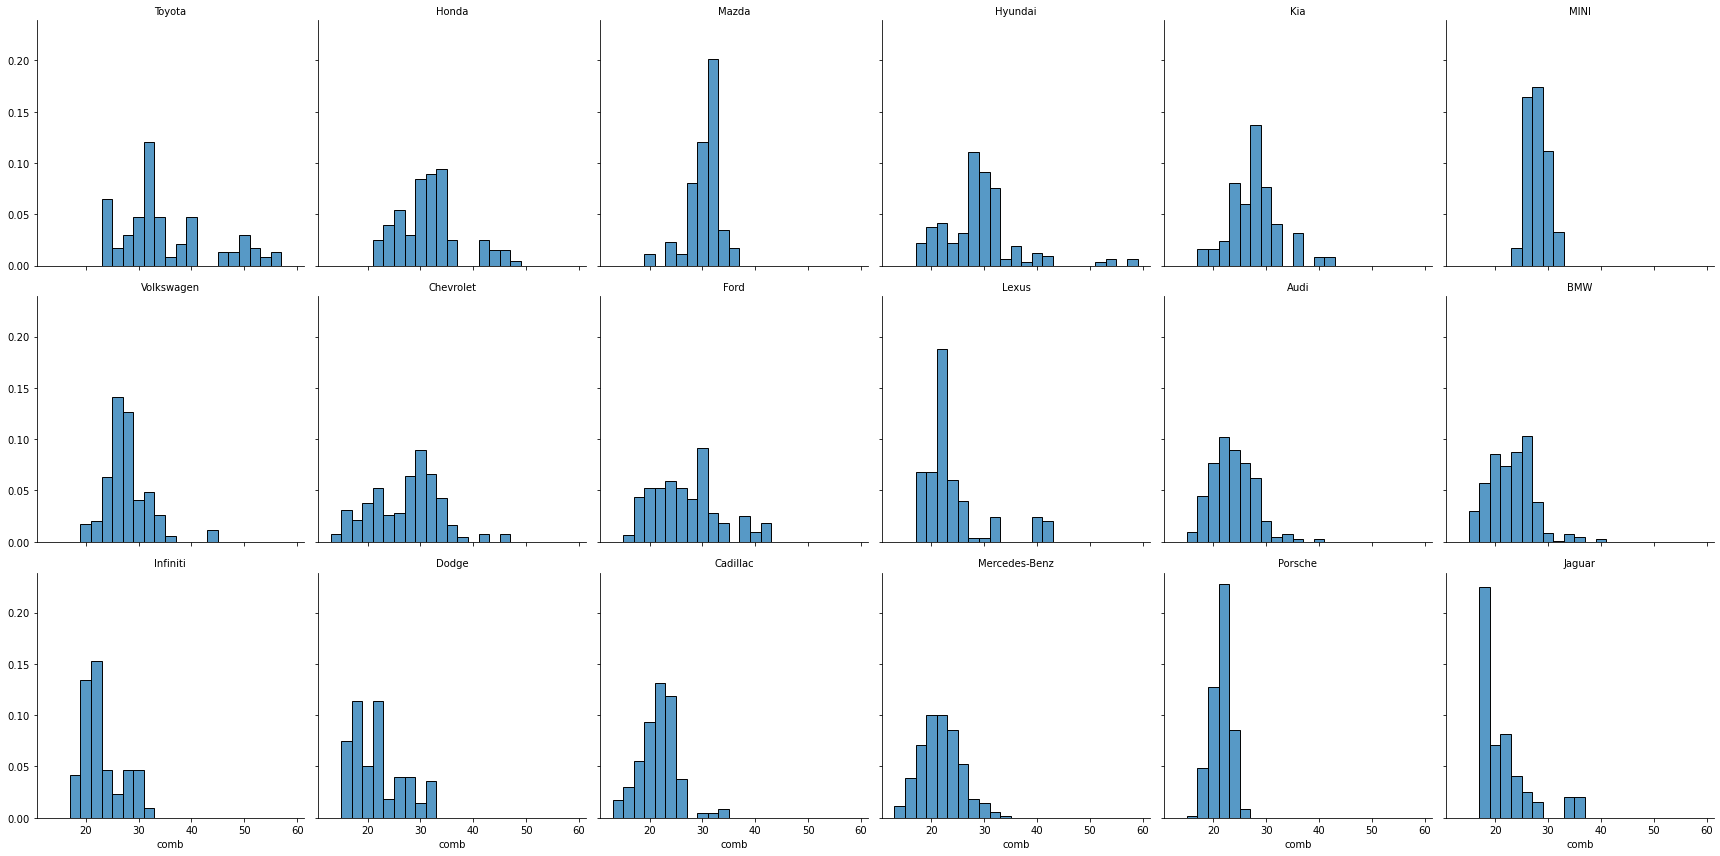

In [128]:
g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(sns.histplot, 'comb', bins=bin_edges, stat='density')
g.set_titles('{col_name}');

**Trial 4: Use `sns.histplot(stat='density', kde=True)` function - with kde.**

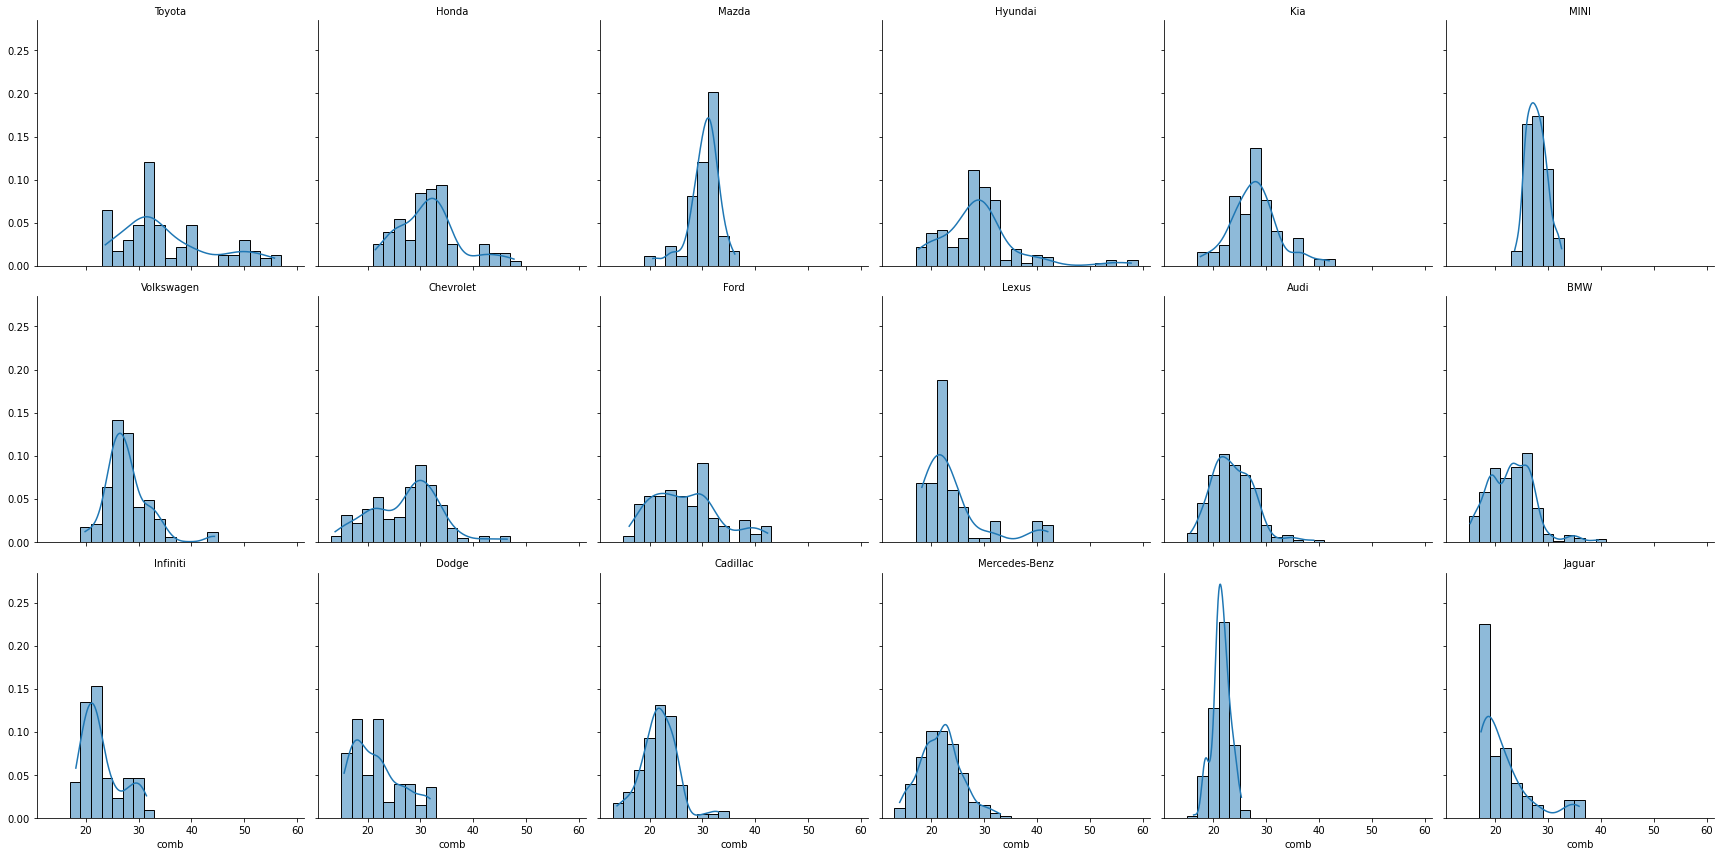

In [131]:
g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(sns.histplot, 'comb', bins=bin_edges, stat='density', kde=True)
g.set_titles('{col_name}');

### Example 5a: Use facet plots to study on the relationship between `displacement` and `efficiency` by different car types.

In [133]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


#### Preparatory Step 1: Extract the transmission type from `trans` column and create a new feature called `trans_type`.

In [139]:
fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x: x.split(' ')[0])

# Verification
fuel_econ.trans_type.value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

#### Preparatory Step 2: Be sure that `VClass` column has been converted to categorical data type.

In [140]:
fuel_econ.VClass.dtypes

CategoricalDtype(categories=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars',
                  'Midsize Cars', 'Large Cars'],
                 ordered=True)

#### Step 3: Facet Plots - Relationship between `displacement` and `efficiency` by car types.

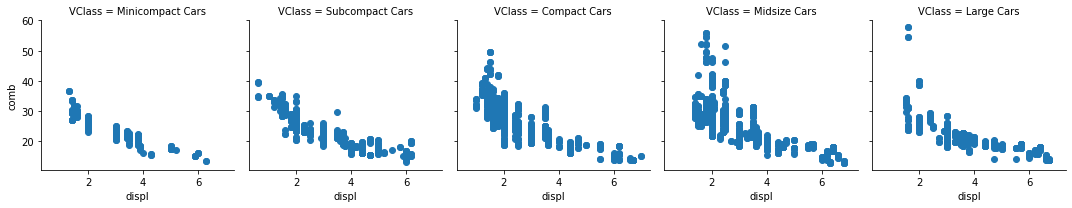

In [142]:
f = sns.FacetGrid(data=fuel_econ, col='VClass')

f.map(plt.scatter, 'displ', 'comb');

### Example 5b: Use facet plots to study on the relationship between `displacement` and `efficiency` by different car types and transmission types.

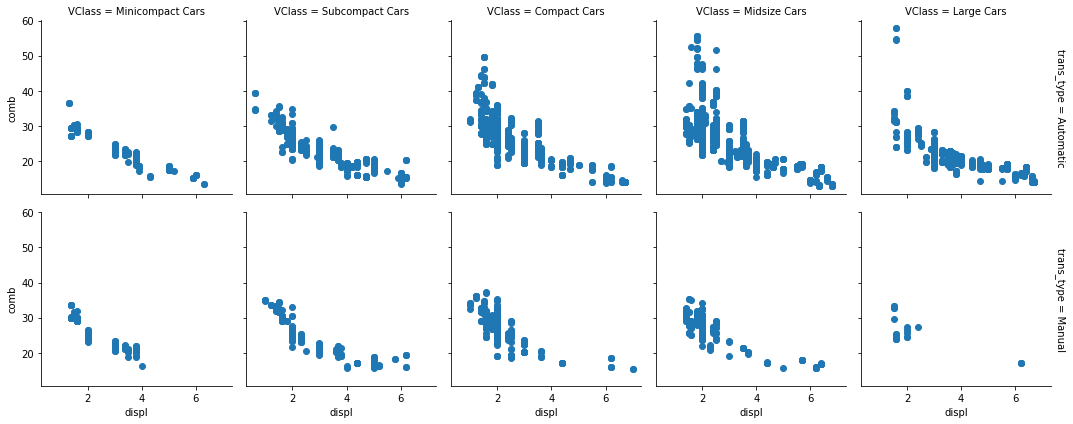

In [162]:
f = sns.FacetGrid(data=fuel_econ, \
                  col='VClass', \
                  row='trans_type', \
                  margin_titles=True, \
                  height=3
                  )

f.map(plt.scatter, 'displ', 'comb');

### Example 6: Multivariate Pointplots

- Add `hue` parameter as a second categorical variable.
- `dodge` used as slightly separate distance within each clustered pointplots (**for visual purpose**).

Previously we have explored the average combined efficiency in different car types in pointplot. Next we can also add in a second categorical feature `trans_type` to compare the average combined efficiency under two categorical variables.

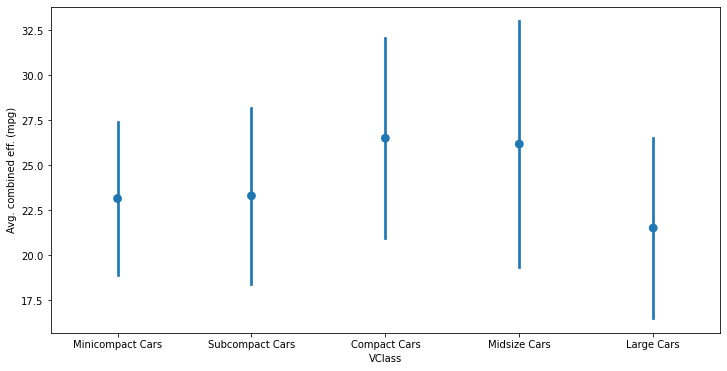

In [169]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', join=False)

plt.ylabel('Avg. combined eff. (mpg)');

#### Multi-variate Pointplots

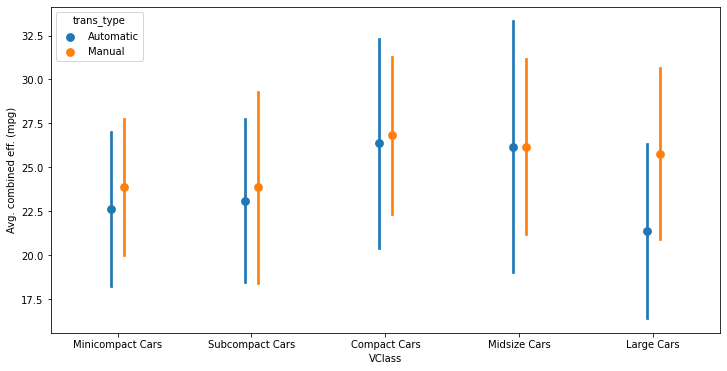

In [176]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type', ci='sd', join=False, dodge=0.1)

plt.legend(loc=2, title='trans_type')
plt.ylabel('Avg. combined eff. (mpg)');

### Example 7: Multivariate Barplots

- Add `hue` parameter as a second categorical variable.


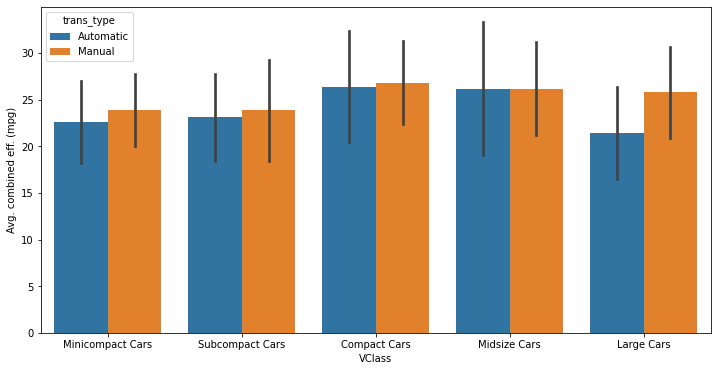

In [186]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type', ci='sd')

plt.legend(loc=2, title='trans_type')
plt.ylabel('Avg. combined eff. (mpg)');

### Example 8: Multivariate Boxplots

- Add `hue` parameter as a second categorical variable.

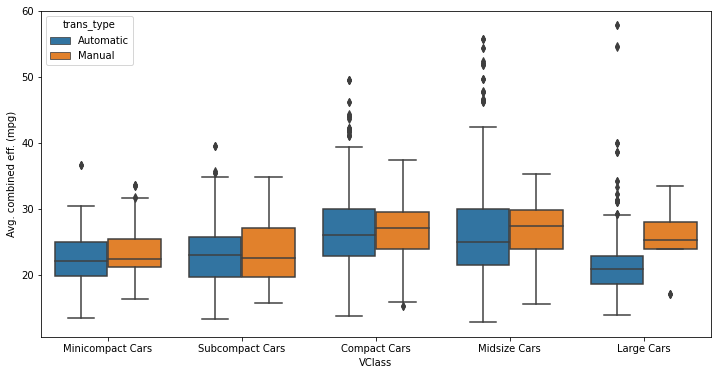

In [188]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type')

plt.legend(loc=2, title='trans_type')
plt.ylabel('Avg. combined eff. (mpg)');

### Example 9: Multivariate Heatmap

- Add `weights` parameter as a second categorical variable.

In [595]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


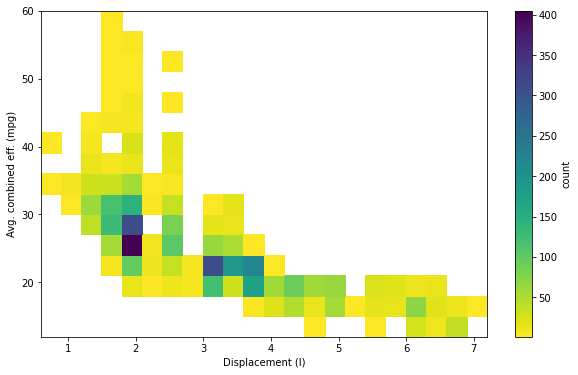

In [790]:
plt.figure(figsize=(10, 6))

bins_x = np.arange(.6, 7+.3, .3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmap='viridis_r', cmin=0.1, bins=[bins_x, bins_y]);

plt.xlabel('Displacement (l)')
plt.ylabel('Avg. combined eff. (mpg)')

plt.colorbar(label='count');

#### Next, we will add in a second categorical variable `avg_co2` in replacement of `count`.

#### Preparatory Step 1: Construct the bins to calculate the data point counts  within each bin.

#### Preparatory Step 2: Calculate the average co2 emission  within each bin.

In [791]:
# displ_bins = pd.cut(fuel_econ['displ'], bins_x, labels=False, right=False, include_lowest=False).astype(int)
# comb_bins = pd.cut(fuel_econ['comb'], bins_y, labels=False, right=False, include_lowest=False).astype(int)

displ_bins = pd.cut(fuel_econ['displ'], bins_x, labels=False, include_lowest=True).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, labels=False, include_lowest=True).astype(int)

In [792]:
pd.cut(fuel_econ['displ'], bins_x, include_lowest=True)

0       (3.6, 3.9]
1       (1.8, 2.1]
2       (3.6, 3.9]
3       (3.6, 3.9]
4       (2.4, 2.7]
           ...    
3924    (1.8, 2.1]
3925    (1.8, 2.1]
3926    (1.8, 2.1]
3927    (3.3, 3.6]
3928    (3.3, 3.6]
Name: displ, Length: 3929, dtype: category
Categories (22, interval[float64]): [(0.599, 0.9] < (0.9, 1.2] < (1.2, 1.5] < (1.5, 1.8] ... (6.0, 6.3] < (6.3, 6.6] < (6.6, 6.9] < (6.9, 7.2]]

In [793]:
displ_bins.unique()

array([10,  4,  6,  9, 14,  3, 11, 18, 17,  8,  2, 16, 12, 13, 20, 19,  5,
        1, 21,  0, 15,  7])

In [794]:
displ_bins.unique().size

22

In [795]:
comb_bins.unique()

array([ 2,  4,  5,  3,  6,  1,  0,  7,  8,  9, 12, 11, 10, 13, 14, 15])

In [796]:
comb_bins.unique().size

16

In [797]:
# Trial
fuel_econ.groupby([displ_bins, comb_bins]).size()

displ  comb
0      7        3
       9        3
1      6        4
       7        8
2      5       43
               ..
19     1       20
       2       15
20     0       38
       1       13
21     1        2
Length: 91, dtype: int64

In [798]:
fuel_econ.groupby([displ_bins, comb_bins]).size()[:50]

displ  comb
0      7         3
       9         3
1      6         4
       7         8
2      5        43
       6        64
       7        28
       8        16
       9         6
       10        4
3      3         6
       4        59
       5       131
       6       114
       7        34
       8         7
       10        7
       11        2
       12        4
       13        1
       14        2
       15        2
4      2        15
       3       103
       4       401
       5       312
       6       143
       7        55
       8        14
       9        31
       10        1
       11       10
       12        3
       13        3
       14        5
5      2         1
       3        15
       4         6
       6         5
       7         1
6      2        11
       3        37
       4       106
       5        84
       6        34
       7         5
       8        15
       9        17
       11        1
       13        1
dtype: int64

In [799]:
fuel_econ.groupby([displ_bins, comb_bins]).size().sum()

3929

In [800]:
# Trial
fuel_econ.groupby([displ_bins, comb_bins]).size().reset_index()

,displ,comb,0
0,0,7,3
1,0,9,3
2,1,6,4
3,1,7,8
4,2,5,43
...,...,...,...
86,19,1,20
87,19,2,15
88,20,0,38
89,20,1,13


In [801]:
# Trial: Combine together
fuel_econ.groupby([displ_bins, comb_bins]).size().reset_index().pivot_table(index='displ', columns='comb')[:5]

0                                                                     \
comb   0   1     2      3      4      5      6     7     8     9    10    11   
displ                                                                          
0     NaN NaN   NaN    NaN    NaN    NaN    NaN   3.0   NaN   3.0  NaN   NaN   
1     NaN NaN   NaN    NaN    NaN    NaN    4.0   8.0   NaN   NaN  NaN   NaN   
2     NaN NaN   NaN    NaN    NaN   43.0   64.0  28.0  16.0   6.0  4.0   NaN   
3     NaN NaN   NaN    6.0   59.0  131.0  114.0  34.0   7.0   NaN  7.0   2.0   
4     NaN NaN  15.0  103.0  401.0  312.0  143.0  55.0  14.0  31.0  1.0  10.0   

                           
comb    12   13   14   15  
displ                      
0      NaN  NaN  NaN  NaN  
1      NaN  NaN  NaN  NaN  
2      NaN  NaN  NaN  NaN  
3      4.0  1.0  2.0  2.0  
4      3.0  3.0  5.0  NaN

In [802]:
# Convert df to ndarray
fuel_econ.groupby([displ_bins, comb_bins]).size().reset_index().pivot_table(index='displ', columns='comb').values[:5]

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  43.,  64.,  28.,  16.,   6.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  59., 131., 114.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15., 103., 401., 312., 143.,  55.,  14.,  31.,   1.,
         10.,   3.,   3.,   5.,  nan]])

In [803]:
# Assign the process above to a variable
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot_table(index='displ', columns='comb').values
n_points[:5]

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,   3.,  nan,   3.,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,   4.,   8.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  43.,  64.,  28.,  16.,   6.,   4.,
         nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,   6.,  59., 131., 114.,  34.,   7.,  nan,   7.,
          2.,   4.,   1.,   2.,   2.],
       [ nan,  nan,  15., 103., 401., 312., 143.,  55.,  14.,  31.,   1.,
         10.,   3.,   3.,   5.,  nan]])

In [804]:
fuel_econ.co2[displ_bins]

10    420
4     310
10    420
10    420
6     412
     ... 
4     310
4     310
4     310
9     461
9     461
Name: co2, Length: 3929, dtype: int64

In [805]:
fuel_econ.co2[comb_bins]

2     429
4     310
2     429
2     429
5     393
     ... 
14    422
9     461
9     461
3     446
3     446
Name: co2, Length: 3929, dtype: int64

In [806]:
displ_bins

0       10
1        4
2       10
3       10
4        6
        ..
3924     4
3925     4
3926     4
3927     9
3928     9
Name: displ, Length: 3929, dtype: int64

In [807]:
displ_bins[displ_bins==0]

1621    0
1967    0
2585    0
3114    0
3913    0
3914    0
Name: displ, dtype: int64

In [808]:
fuel_econ.displ.describe()

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [809]:
pd.cut(fuel_econ['displ'], bins_x, include_lowest=True)

0       (3.6, 3.9]
1       (1.8, 2.1]
2       (3.6, 3.9]
3       (3.6, 3.9]
4       (2.4, 2.7]
           ...    
3924    (1.8, 2.1]
3925    (1.8, 2.1]
3926    (1.8, 2.1]
3927    (3.3, 3.6]
3928    (3.3, 3.6]
Name: displ, Length: 3929, dtype: category
Categories (22, interval[float64]): [(0.599, 0.9] < (0.9, 1.2] < (1.2, 1.5] < (1.5, 1.8] ... (6.0, 6.3] < (6.3, 6.6] < (6.6, 6.9] < (6.9, 7.2]]

In [810]:
comb_bins

0        2
1        4
2        2
3        2
4        5
        ..
3924    14
3925     9
3926     9
3927     3
3928     3
Name: comb, Length: 3929, dtype: int64

In [811]:
pd.cut(fuel_econ['displ'], bins_x, include_lowest=True, retbins=True)

(0       (3.6, 3.9]
 1       (1.8, 2.1]
 2       (3.6, 3.9]
 3       (3.6, 3.9]
 4       (2.4, 2.7]
            ...    
 3924    (1.8, 2.1]
 3925    (1.8, 2.1]
 3926    (1.8, 2.1]
 3927    (3.3, 3.6]
 3928    (3.3, 3.6]
 Name: displ, Length: 3929, dtype: category
 Categories (22, interval[float64]): [(0.599, 0.9] < (0.9, 1.2] < (1.2, 1.5] < (1.5, 1.8] ... (6.0, 6.3] < (6.3, 6.6] < (6.6, 6.9] < (6.9, 7.2]],
 array([0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6, 3.9, 4.2,
        4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2]))

In [812]:
displ_bins[displ_bins==31]

Series([], Name: displ, dtype: int64)

In [813]:
fuel_econ.iloc[[1318, 1517]]

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
1318,34793,Chevrolet,Camaro,2014,Compact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,8,7.0,...,0,13.0553,16.0,19.216,26.5,15.2564,580,2,2,Manual
1517,35124,Chevrolet,Camaro,2015,Compact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,8,7.0,...,0,13.0553,16.0,19.216,26.5,15.2564,580,3,3,Manual


In [814]:
displ_bins.min(), displ_bins.max()

(0, 21)

In [815]:
comb_bins.min(), comb_bins.max()

(0, 15)

In [816]:
n_points.shape

(22, 16)

In [817]:
n_points[displ_bins, comb_bins]

array([177., 401., 177., ...,  31., 182., 182.])

In [818]:
n_points[displ_bins, comb_bins].size

3929

In [819]:
co2_avg = fuel_econ.co2 / n_points[displ_bins, comb_bins]
co2_avg

0        2.661017
1        0.870324
2        2.423729
3        2.519774
4        3.690476
          ...    
3924    15.600000
3925     7.000000
3926     6.838710
3927     2.126374
3928     2.291209
Name: co2, Length: 3929, dtype: float64

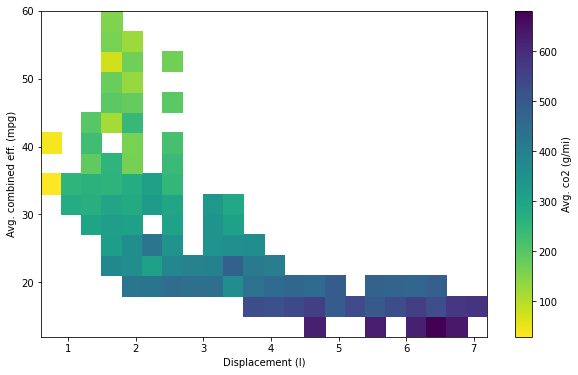

In [820]:
plt.figure(figsize=(10, 6))
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmap='viridis_r', cmin=0.1, bins=[bins_x, bins_y], weights=co2_avg);

plt.xlabel('Displacement (l)')
plt.ylabel('Avg. combined eff. (mpg)')

plt.colorbar(label='Avg. co2 (g/mi)');

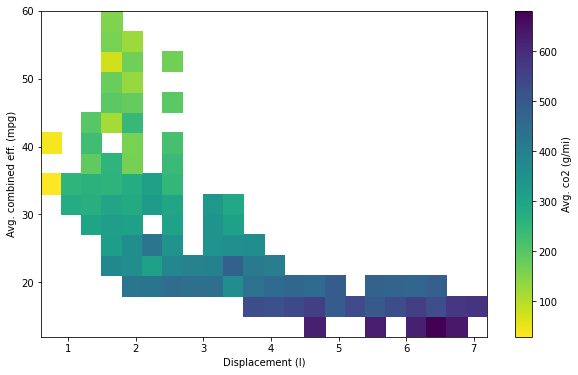

In [824]:
def heat_plots():
    plt.figure(figsize=(10, 6))

    bins_x = np.arange(.6, 7+.3, .3)
    bins_y = np.arange(12, 58+3, 3)

    displ_bins = pd.cut(fuel_econ['displ'], bins_x, labels=False, include_lowest=True).astype(int)
    comb_bins = pd.cut(fuel_econ['comb'], bins_y, labels=False, include_lowest=True).astype(int)

    n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
    n_points = n_points.reset_index().pivot_table(index='displ', columns='comb').values

    co2_avg = fuel_econ.co2 / n_points[displ_bins, comb_bins]

    plt.hist2d(data=fuel_econ, x='displ', y='comb', cmap='viridis_r', cmin=0.1, bins=[bins_x, bins_y], weights=co2_avg);

    plt.xlabel('Displacement (l)')
    plt.ylabel('Avg. combined eff. (mpg)')

    plt.colorbar(label='Avg. co2 (g/mi)');
    
heat_plots()

### Example 10. Scatter Plot Faceting

___Context:___

Plot the city (`city`) vs. highway (`highway`) fuel efficiencies (both in mpg) for each vehicle class (`VClass`) with vehicle class being in an ordinal order sucha as: Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars.

In [825]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars', 'Minicompact Cars']
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' < 'Large Cars']

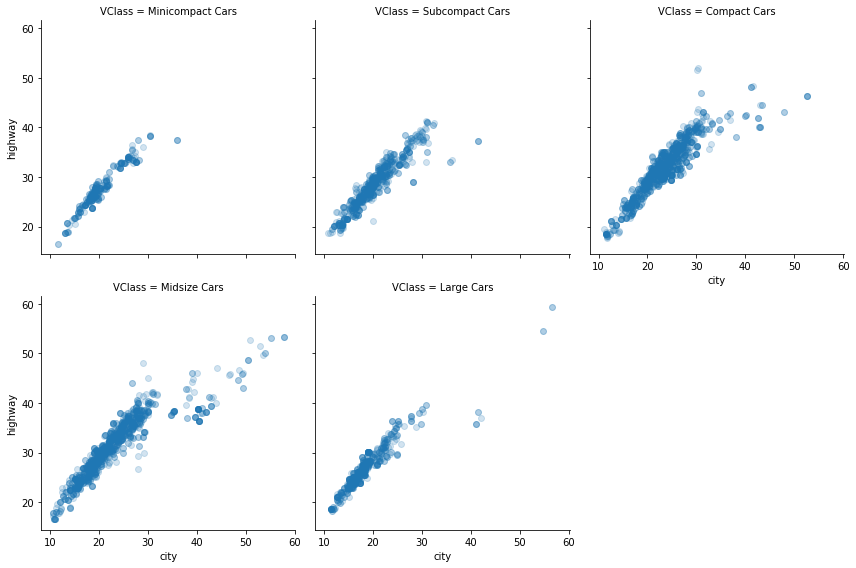

In [834]:
f = sns.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3, height=4)
f.map(plt.scatter, 'city', 'highway', alpha=0.2);

___Conclusion:___ Due to overplotting, I've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the `Midsize Cars` and `Compact Cars`.

### Example 10. Boxplot Faceting

___Context:___

Explore the relationship between engine size (`displ`, in meters), vehicle class, and fuel type (`fuelType`). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars.

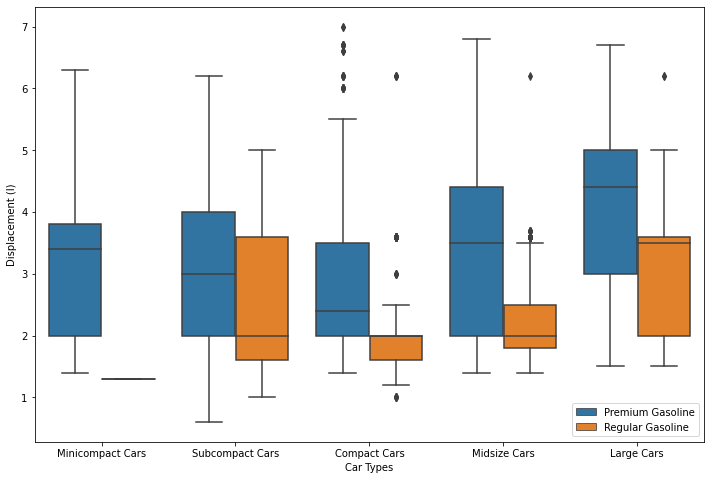

In [858]:
fuel_econ_sub = fuel_econ[fuel_econ.fuelType.isin(['Premium Gasoline', 'Regular Gasoline'])]

plt.figure(figsize=(12, 8))
sns.boxplot(data=fuel_econ_sub, x='VClass', y='displ', hue='fuelType')

plt.xlabel('Car Types')
plt.ylabel('Displacement (l)')
plt.legend(bbox_to_anchor = (1, 0.1));